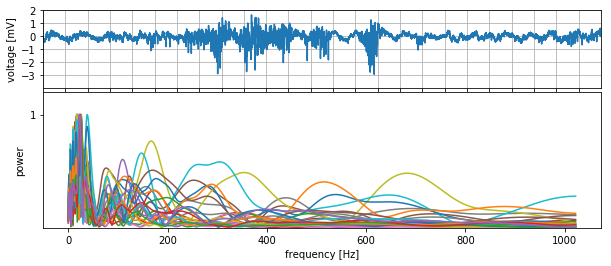

In [5]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import pandas as pd
import sys
import scipy
from swan import pycwt
from scipy import signal
from pylab import *
with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)
fs = 25000 #サンプリング周波数
#starttime = 1991.0946
#starttime = 1991.6946
#endtime = 1991.9946
starttime = 1700
endtime = 1701
start = int(starttime*fs)
end = int(endtime*fs)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
plt.subplot(4, 1, 1)
xlim(starttime,endtime)
plt.yticks([-3,-2,-1,0,1,2])
plt.ylim(-4,2)
ylabel("voltage [mV]")
#plt.xticks(color="None")
plt.plot(datatime,df[start:end])
plt.grid(which='major')
#gca().xaxis.set_minor_locator(MultipleLocator(0.04))
leng = np.arange(starttime, endtime, 0.04)
plt.xticks(leng,color="None")
#plt.xaxis.set_minor_locator(dates.DayLocator(interval=0.04))
#gca().xaxis.set_minor_locator(True,0.04)
del datatime

specdatab = np.array(df[start:end])
specdataa = specdatab.flatten()
fp.close
#widths = np.arange(1, 31)
P = 1024
widths = np.arange(1, P)

plt.subplot(2, 1, 2)
cwtmatr = pycwt.cwt_f(specdataa, widths, 25000, pycwt.Morlet())# pycwt.Mexican_hat(8))
#signal, scales, dt, wavelet = cwtmatr
rr = np.abs(cwtmatr)
#xlabel("time [second]")
xlabel("frequency [Hz]")
ylabel("power")
plt.yticks([1,10,100,1000])
plt.ylim(0,1.2)
#plt.yscale("log")
#im=plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
#im=plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=0)
#im = plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], aspect='auto', interpolation='nearest')


spec = pd.DataFrame(rr)
del cwtmatr, specdataa

#a =  np.empty(P,len(df[start:end]))
del rr
s=1000
h=150
spec_new = pd.DataFrame(index=spec.index, columns=[])
for i in range(0,len(df[start:end])-1,s) :
    #spec1 = spec[[i],[h:spec.index]]
    #print(spec[i])
    spec1 = spec[i]
    #spec1 = spec.iloc[h:,i]
    #print(spec[h:,i])
    mr = max(spec1)
    #print(mr)
    spec1 /= mr
    spec_new[i/s]=spec1
    plot(spec1)
    #print(type(spec1))
    #spec1.to_csv('torima.csv',index=False)
    #a[i,] = spec1
spec_new.T.to_csv('datatori.csv',index=False)
#im = plt.imshow(spec_new, extent=[starttime, endtime, P, 1], aspect='auto', interpolation='nearest')

#xlim(starttime, endtime)
#axColor = plt.axes([0.91, 0.13, 0.03, 0.45])
#plt.colorbar(im, cax=axColor, orientation="vertical")
#ylim(0, 4096)
#plt.colorbar(orientation='horizontal')
#plt.show()
plt.savefig('toriahigh.png',dpi=300)

#for i in range(len(freq)) :
 #   freq = cwtmatr[:,i]
    
#freq = pd.Series(cwtmatr, dtype='c8')
#freq1 = cwtmatr.ix[600]
#print(rr)
#spec = pd.DataFrame(rr)
#del cwtmatr

#a =  np.empty(P,len(df[start:end]))

#print(freq1)

#print(sys.path)

#p.show()
#plt.show(dpi=300)
#del df, widths, axColor, spec, spec1
del df, widths,  spec, spec1

In [4]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import pandas as pd
import sys
import scipy
from swan import pycwt
from scipy import signal
from pylab import *
#with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)

starttime = 1700
endtime = 1701
start = int(starttime/0.00004)
end = int(endtime/0.00004)

del starttime, endtime

specdatab = np.array(df[start:end])
specdataa = specdatab.flatten()

fp.close

P = 1024
widths = np.arange(1, P)


cwtmatr = pycwt.cwt_f(specdataa, widths, 25000, pycwt.Morlet())
rr = np.abs(cwtmatr)
del cwtmatr


spec = pd.DataFrame(rr)
del specdataa
#print(spec)
print(spec.index)
del rr
s=1000
spec_new = pd.DataFrame(index=spec.index, columns=[])
for i in range(0,len(df[start:end])-1,s) :
    spec1 = spec[i]
    print(spec[i])
    spec_new[i/s]=spec1
spec_new.T.to_csv('datatori.csv',header=False, index=False)

del df, widths, spec, spec1

RangeIndex(start=0, stop=1023, step=1)
0       0.781271
1       2.395794
2       1.300762
3       1.414828
4       1.145844
5       0.164766
6       0.677862
7       0.909262
8       0.702412
9       0.304242
10      0.813353
11      1.292649
12      1.993968
13      2.979160
14      3.897023
15      4.659621
16      5.327702
17      5.827946
18      6.058218
19      6.012179
20      5.748218
21      5.335143
22      4.829868
23      4.282015
24      3.752349
25      3.316998
26      3.035316
27      2.902330
28      2.848617
29      2.795719
          ...   
993     0.108240
994     0.107779
995     0.107315
996     0.106848
997     0.106378
998     0.105905
999     0.105428
1000    0.104949
1001    0.104467
1002    0.103982
1003    0.103495
1004    0.103004
1005    0.102510
1006    0.102014
1007    0.101515
1008    0.101013
1009    0.100508
1010    0.100001
1011    0.099491
1012    0.098978
1013    0.098463
1014    0.097945
1015    0.097424
1016    0.096901
1017    0.096375
1018    0

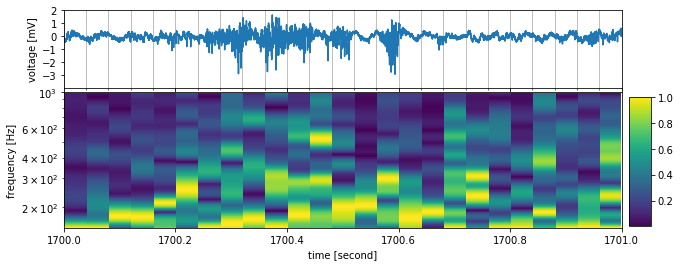

In [5]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import pandas as pd
import sys
import scipy
from swan import pycwt
from scipy import signal
from pylab import *
spec = pd.read_csv('150Hzhpassdata.csv', header=None)
#spec = spec.T
#print(type(spec))

#with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)
starttime = 1700
endtime = 1701
start = int(starttime/0.00004)
end = int(endtime/0.00004)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)
plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
plt.subplot(4, 1, 1)
xlim(starttime,endtime)
plt.yticks([-3,-2,-1,0,1,2])
plt.ylim(-4,2)
ylabel("voltage [mV]")
plt.xticks(color="None")
plt.plot(datatime,df[start:end])
plt.grid(which='minor')
gca().xaxis.set_minor_locator(MultipleLocator(0.04))
del datatime

plt.subplot(2, 1, 2)
xlabel("time [second]")
ylabel("frequency [Hz]")
spec_new = pd.DataFrame(index=spec.T.index, columns=[])
for i in range(0,len(spec)) :
    #spec1 = spec[[i],[h:spec.index]]
    #print(spec[i])
    spec1 = spec.T[i]
    #spec1 = spec.iloc[h:,i]
    #print(spec[h:,i])
    mr = max(spec1)
    #print(mr)
    spec1 /= mr
    #plot(spec1)
    spec_new[i]=spec1
    #print(type(spec1))
    #spec1.to_csv('torima.csv',index=False)
    #a[i,] = spec1
#print(spec_new)
#spec_new.T.to_csv('datatori.csv',index=False)
im = plt.imshow(spec_new, extent=[starttime, endtime, 1023, 150], aspect='auto', interpolation='nearest')
plt.yticks([150,600,1000])
plt.ylim(150,1000)
plt.yscale("log")
xlim(starttime, endtime)
axColor = plt.axes([0.91, 0.13, 0.03, 0.45])
plt.colorbar(im, cax=axColor, orientation="vertical")
#plt.show()
plt.savefig('150Hzhpass.png',dpi=300)

           0         1         2         3         4         5         6   \
0    1.000000  1.000000  0.314012  0.562735  0.762404  0.317323  1.000000   
1    0.969130  0.971156  0.348946  0.593150  0.749620  0.345142  0.986581   
2    0.938083  0.940406  0.386605  0.623742  0.739271  0.372375  0.968757   
3    0.906912  0.908153  0.426199  0.654230  0.731124  0.398289  0.946889   
4    0.875669  0.874800  0.467034  0.684359  0.724935  0.422416  0.921380   
5    0.844406  0.840739  0.508498  0.713896  0.720445  0.444466  0.892669   
6    0.813170  0.806344  0.550055  0.742632  0.717386  0.464268  0.861219   
7    0.782008  0.771970  0.591238  0.770383  0.715474  0.481738  0.827516   
8    0.750967  0.737942  0.631634  0.796984  0.714408  0.496849  0.792056   
9    0.720089  0.704559  0.670887  0.822293  0.713875  0.509620  0.755348   
10   0.689415  0.672085  0.708686  0.846187  0.713543  0.520102  0.717908   
11   0.658985  0.640756  0.744765  0.868561  0.713069  0.528370  0.680254   

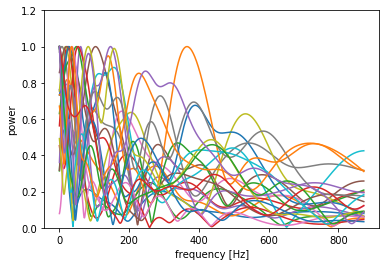

In [19]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import pandas as pd
import sys
import scipy
from swan import pycwt
from scipy import signal
from pylab import *
spec = pd.read_csv('150Hzhpassdata.csv', header=None)
#spec = spec.T
#print(type(spec))

datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])



#plt.subplot(2, 1, 2)
ylabel("power")
xlabel("frequency [Hz]")
spec_new = pd.DataFrame(index=spec.T.index, columns=[])
for i in range(0,len(spec)) :
    #spec1 = spec[[i],[h:spec.index]]
    #print(spec[i])
    spec1 = spec.T[i]
    #spec1 = spec.iloc[h:,i]
    #print(spec[h:,i])
    mr = max(spec1)
    #print(mr)
    plt.ylim(0,1.2)
    spec1 /= mr
    plot(spec1)
    spec_new[i]=spec1
    #print(type(spec1))
print(spec_new)